In [1]:
import tensorflow as tf
print(tf.__version__)

2.4.0


In [3]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, SimpleRNN, LSTM, GRU, Dense, Flatten
from tensorflow.keras.optimizers import Adam, SGD

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape:", x_train.shape)

11493376/11490434 [==============================] - 0s 0us/step
x_train.shape: (60000, 28, 28)


In [32]:
i = Input(shape=x_train[0].shape)
x = LSTM(units=128)(i)
x = Dense(units=10, activation=tf.keras.activations.softmax)(x)

model = Model(inputs=[i], outputs=[x])
model.compile(optimizer=Adam(), 
              loss=tf.keras.losses.sparse_categorical_crossentropy, 
              metrics=["accuracy"])

r = model.fit(x=x_train, y=y_train, 
              epochs=10, 
              validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 [==============================] - 11s 5ms/step - loss: 0.6620 - accuracy: 0.7797 - val_loss: 0.1211 - val_accuracy: 0.9616
Epoch 2/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1129 - accuracy: 0.9665 - val_loss: 0.0876 - val_accuracy: 0.9740
Epoch 3/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0744 - accuracy: 0.9771 - val_loss: 0.0814 - val_accuracy: 0.9759
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0530 - accuracy: 0.9830 - val_loss: 0.0546 - val_accuracy: 0.9827
Epoch 5/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0429 - accuracy: 0.9876 - val_loss: 0.0581 - val_accuracy: 0.9835
Epoch 6/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0371 - accuracy: 0.9887 - val_loss: 0.0552 - val_accuracy: 0.9841
Epoch 7/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0337 - accuracy: 0.9895 - val_loss: 0.0492 - val_accuracy

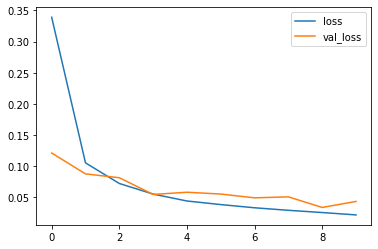

In [33]:
plt.plot(r.history["loss"], label="loss")
plt.plot(r.history["val_loss"], label="val_loss")
plt.legend()
plt.show()

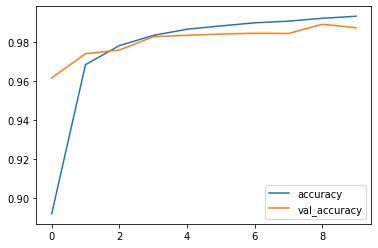

In [34]:
plt.plot(r.history["accuracy"], label="accuracy")
plt.plot(r.history["val_accuracy"], label="val_accuracy")
plt.legend()
plt.show()

In [35]:
from sklearn.metrics import confusion_matrix
import itertools

Confusion matrix, without normalization
[[ 972    0    0    1    1    2    3    1    0    0]
 [   0 1129    0    0    0    0    4    2    0    0]
 [   2    1 1024    2    1    0    0    2    0    0]
 [   0    0    4  999    0    3    0    2    1    1]
 [   0    0    0    0  965    0    6    1    0   10]
 [   0    0    0    6    0  883    2    0    0    1]
 [   1    2    1    0    2    4  946    0    2    0]
 [   1    3    4    1    0    0    0 1017    0    2]
 [   0    1    6    1    2    5    0    2  949    8]
 [   0    0    0    2    9    5    0    3    0  990]]


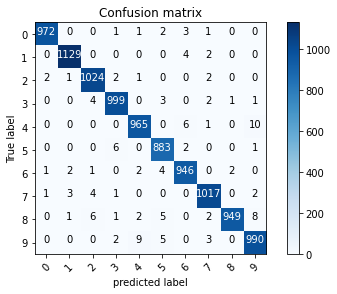

In [36]:
def plot_confusion_matrix(cm, classes, 
                          normalize=False, 
                          title="Confusion matrix", 
                          cmap=plt.cm.Blues):
    
    if normalize:
        cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print("Confusion matrix, without normalization")
    
    print(cm)

    plt.imshow(cm, interpolation="nearest", cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = ".2f" if normalize else "d"
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), 
                 horizontalalignment="center", 
                 color="white" if cm[i, j] > thresh else "black")
        
    plt.tight_layout()
    plt.ylabel("True label")
    plt.xlabel("predicted label")
    plt.show()

p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

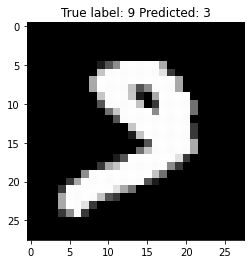

In [37]:
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28, 28), cmap="gray")
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]))
plt.show()